In [36]:
%matplotlib inline
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import pandas as pd

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from  tqdm import tqdm
import plotly.graph_objects as go


import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)


In [37]:
import sys
sys.path.append("../../src/")


In [99]:
%load_ext autoreload
%autoreload 2

from qeview.qe_analyse_PM import qe_analyse_PM
import qeview.wannier_loader as wnldr 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
Ang2Bohr = 1.8897259886
Bohr2Ang = 1./Ang2Bohr


# QE

In [67]:
calc = qe_analyse_PM('./', 'FeCl2')

efermi -0.51
Unit Cell Volume:   199.0057  (Ang^3)
alat 3.4700
Reciprocal-Space Vectors cart (Ang^-1)
[[ 1.8536487674  1.0702046148 -0.          ]
 [ 0.            2.1404092296  0.          ]
 [ 0.           -0.            0.3141592427]]
Reciprocal-Space Vectors cart (2 pi / alat)
[[ 1.0237103271  0.5910394329 -0.          ]
 [ 0.            1.1820788658  0.          ]
 [ 0.           -0.            0.1735      ]]
Real-Space Vectors cart (Ang)
[[ 3.3896309904  0.            0.          ]
 [-1.6948154952  2.9355065471  0.          ]
 [ 0.            0.           20.0000014396]]
Real-Space Vectors cart (alat)
[[ 0.9768388318  0.            0.          ]
 [-0.4884194159  0.8459672438  0.          ]
 [ 0.            0.            5.7636887608]]


 positions cart (alat)
['Fe', 'Cl', 'Cl']
[[0.           0.           2.8818443804]
 [0.           0.5639781061 2.529543436 ]
 [0.4884194648 0.2819890531 3.2341453248]]
positions (frac or crystal)
[[0.           0.           0.5         ]
 [0.3333

In [80]:
_,_ = calc.get_qe_kpathBS(filename="kpath_qe2.dat", saveQ=True, points_per_unit=10)

G 0.00000000 0.00000000 0.00000000 0.00000000
. 0.00000000 0.10000000 0.00000000 0.11820789
. 0.00000000 0.20000000 0.00000000 0.23641577
. 0.00000000 0.30000000 0.00000000 0.35462366
. 0.00000000 0.40000000 0.00000000 0.47283155
M 0.00000000 0.50000000 0.00000000 0.59103943
. -0.11111111 0.55555556 0.00000000 0.70478502
. -0.22222222 0.61111111 0.00000000 0.81853062
K -0.33333333 0.66666667 0.00000000 0.93227621
. -0.27777778 0.55555556 0.00000000 1.04602180
. -0.22222222 0.44444444 0.00000000 1.15976739
. -0.16666667 0.33333333 0.00000000 1.27351298
. -0.11111111 0.22222222 0.00000000 1.38725858
. -0.05555556 0.11111111 0.00000000 1.50100417
G 0.00000000 0.00000000 0.00000000 1.61474976


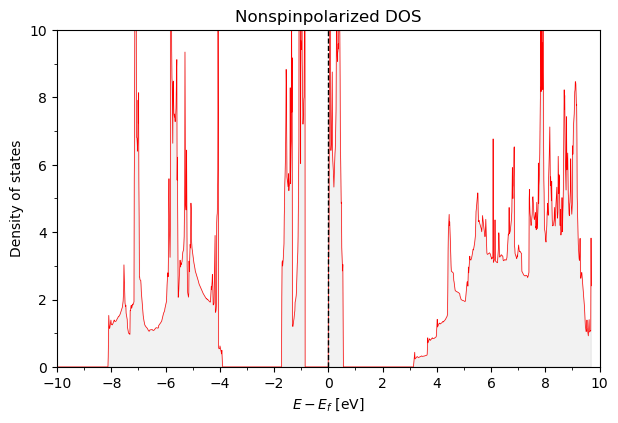

In [61]:
calc.plot_FullDOS(efrom=-10, eto=10)

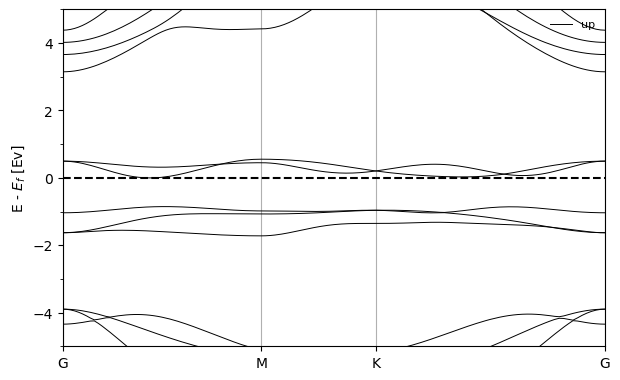

In [63]:
calc.plot_BS(efrom=-5, eto=5)

In [64]:
calc.print_bands_range(7, 20)

efermi -0.51
-------------BANDS---------------
band 8 eV from  -7.66 to  -6.33                 eV-eF from  -7.16 to  -5.82
band 9 eV from  -7.59 to  -6.05                 eV-eF from  -7.08 to  -5.55
band 10 eV from  -6.33 to  -4.75                 eV-eF from  -5.82 to  -4.24
band 11 eV from  -6.06 to  -4.40                 eV-eF from  -5.55 to  -3.90
band 12 eV from  -5.69 to  -4.40                 eV-eF from  -5.18 to  -3.90
band 13 eV from  -2.23 to  -1.82                 eV-eF from  -1.72 to  -1.32
band 14 eV from  -2.14 to  -1.47                 eV-eF from  -1.63 to  -0.96
band 15 eV from  -1.54 to  -1.36                 eV-eF from  -1.04 to  -0.85
band 16 eV from  -0.51 to  -0.01                 eV-eF from  -0.00 to  0.50
band 17 eV from  -0.39 to  0.05                 eV-eF from  0.11 to  0.55
band 18 eV from  2.64 to  5.34                 eV-eF from  3.15 to  5.85
band 19 eV from  3.15 to  6.54                 eV-eF from  3.66 to  7.04
band 20 eV from  3.52 to  6.83             

In [69]:
calc.get_pDOS()

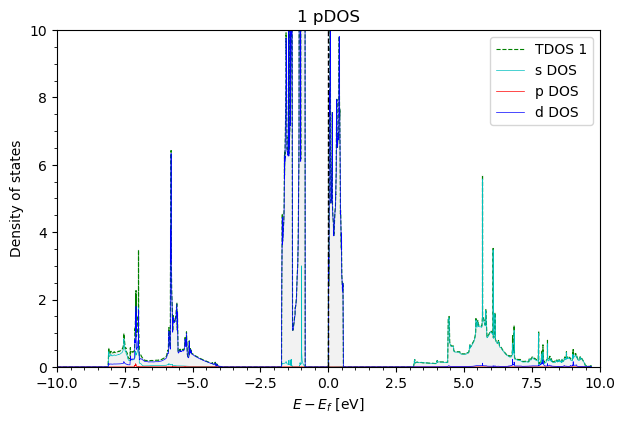

In [71]:
calc.plot_pDOS('1', efrom=-10, eto=10)

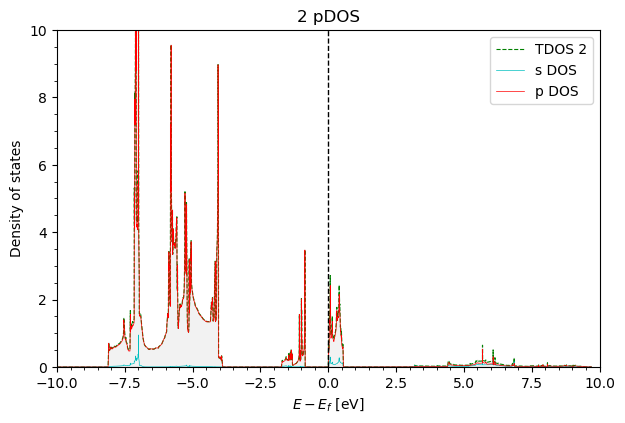

In [74]:
calc.plot_pDOS('2', efrom=-10, eto=10 )

# Wannier bands

In [85]:
calc.load_wannier(kpath_filename='kpath_qe2.dat', wannier_hr='FeCl2_hr.dat')

nwa  5
Rpts 601
we have 2D hamiltonian


100%|██████████| 15/15 [00:00<00:00, 308.65it/s]


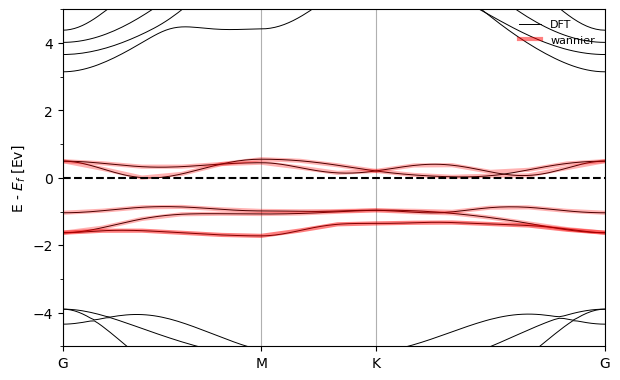

In [89]:
#interpolate the bands, on the plot bolds are interpolated wannier bands
calc.plot_wannier_BS(efrom=-5, eto=5)

In [92]:
#now we want to plot the wannier bands on several BZ (normally you don't need to do this)

loader = wnldr.Wannier_loader_PM('./', 'FeCl2_hr.dat')

acell = np.linalg.norm(calc.acell[0]) # AA
b1 = calc.bcell[0][:2] / (2. * np.pi / acell)  # First reciprocal lattice vector in units of 2pi/a
b2 = calc.bcell[1][:2] / (2. * np.pi / acell) # Second reciprocal lattice vector in units of 2pi/a



nwa  5
Rpts 601
we have 2D hamiltonian


In [93]:
klim = 1.0 # want to have data in range [-1, 1] (in units of 2pi/a)
nkpt = 20

bs, _ = loader.get_dense_hk_symmetric(nkpt=nkpt, krange=klim, find_eigsQ=True)


  0%|          | 0/1600 [00:00<?, ?it/s]

100%|██████████| 1600/1600 [00:04<00:00, 326.76it/s]


In [94]:
band_str = bs[:,:,0]


In [95]:

# k crystal
kpoints_adj_serial = np.mgrid[-klim:klim:1.0/nkpt, -klim:klim:1.0/nkpt].reshape(2,-1).T
x = kpoints_adj_serial[:, 0] 
y = kpoints_adj_serial[:, 1] 


# k cart (2 pi / alat)
coords = [ x[i]  * b1 + y[i]* b2 for i in range(len(x))] # repr cart in 2 pi / alat
coords = np.array(coords)
kx = coords[:, 0] 
ky = coords[:, 1] 




In [98]:
z = np.real(band_str[ 3, :] - calc.efermi) # 3rd band

fig = go.Figure()
fig.add_trace(go.Contour(x=kx,y=ky,z=z,line_smoothing=1.3))

contour_trace = go.Contour(
    z=z,
    x=kx,
    y=ky,
    contours=dict(
        start=0,
        end=0,
        size=0.1,
        coloring='lines'
    ),
    showscale=False,
    line=dict(width=2)
)
fig.add_trace(contour_trace)

# Create the figure


# Hexagonal Brillouin Zone vertices
BZ_vertices = np.array([
    0.666 * b1 - 0.333 * b2, 
    0.333 * b1 + 0.333 * b2, 
    -0.333 * b1 + 0.666 * b2, 
    -0.666 * b1 + 0.333 * b2, 
    -0.333 * b1 - 0.333 * b2, 
    0.333 * b1 - 0.666 * b2,
    0.666 * b1 - 0.333 * b2])

# High-symmetry points in units of (2π/a)
Gamma = np.array([0, 0])
M = 0.5 * b2
K = -0.3333333333 * b1 + 0.6666666667 * b2


# Add arrows for b1 and b2
fig.add_annotation(
    x=b1[0], y=b1[1],
    ax=0, ay=0,
    xref="x", yref="y",
    axref="x", ayref="y",
    showarrow=True,
    arrowhead=3,
    arrowsize=2,
    arrowwidth=2,
    arrowcolor="green",
    text="b1",
    font=dict(size=12, color="green"),
    yshift=0
)

fig.add_annotation(
    x=b2[0], y=b2[1],
    ax=0, ay=0,
    xref="x", yref="y",
    axref="x", ayref="y",
    showarrow=True,
    arrowhead=3,
    arrowsize=2,
    arrowwidth=2,
    arrowcolor="purple",
    text="b2",
    font=dict(size=12, color="purple"),
    yshift=0
)

# Path: Γ → M → K → Γ
path = np.array([Gamma, M, K, Gamma])

# Plot high-symmetry points
high_symmetry_labels = ['Γ', 'M', 'K']
high_symmetry_points = [Gamma, M, K]
for point, label in zip(high_symmetry_points, high_symmetry_labels):
    fig.add_trace(go.Scatter(
        x=[point[0]], 
        y=[point[1]], 
        mode='markers+text',
        text=[label],
        textposition="top center",
        marker=dict(color='red', size=10),
        name=label,
        showlegend=False
    ))
    
# Plot path
fig.add_trace(go.Scatter(
    x=path[:, 0], 
    y=path[:, 1], 
    mode='lines+markers', 
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(color='red', size=6),
    name='Path: Γ → M → K → Γ',
    showlegend=False
))


# Plot BZ
fig.add_trace(go.Scatter(
    x=BZ_vertices[:, 0], 
    y=BZ_vertices[:, 1], 
    mode='lines', 
    line=dict(color='black', width=2),
    showlegend=False
))



fig.update_layout(
    autosize=False,
    width=800,  # Width of the figure
    height=800,  # Height of the figure
    xaxis=dict(
        scaleanchor="y",  # Match the scale of the x-axis with the y-axis
        title="kx cart in 2 pi / alat",
        range=[-1, 1]
    ),
    yaxis=dict(title="ky cart in 2 pi / alat", range=[-1, 1]),
    title="band str a.u. in FeCL2"
)
fig.show()

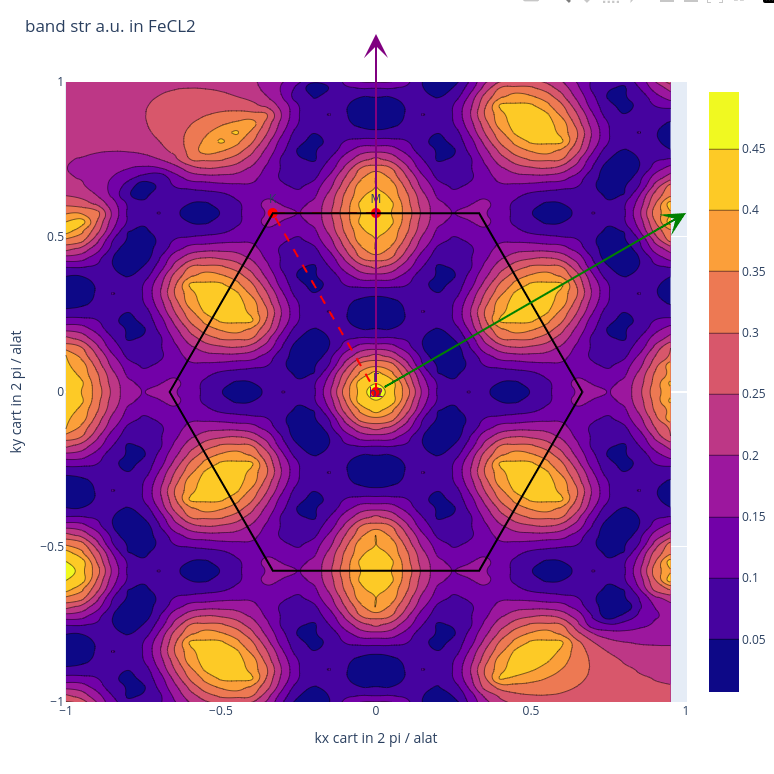